In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wisps
from tqdm import tqdm
from astropy.table import Table
%matplotlib inline


Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database


In [2]:
def get_source(grism_id):
    return  wisps.Source(filename=grism_id.replace('g141', 'G141'))

def invert_parallax(plx, plx_er):
    plxs=np.random.normal(plx, plx_er, 1000)
    return np.nanmedian(1/plxs)

In [3]:
#Crossmatches using topcat
hdus=fits.open(wisps.LIBRARIES+'/master_crossmatch.fits')
ucds=pd.read_pickle(wisps.LIBRARIES+'/new_real_ucds.pkl')

In [4]:
#gaia

In [5]:
simbad=Table(hdus[1].data).to_pandas()
tmass=Table(hdus[2].data).to_pandas()
gaia=Table(hdus[3].data).to_pandas()
panstarrs=Table(hdus[4].data).to_pandas()
sdss=Table(hdus[5].data).to_pandas()
yise=Table(hdus[6].data).to_pandas()
#closest objects
gaia['gaia_distance']=np.nanmedian(1000/np.random.normal(gaia.parallax, gaia.parallax_error, size=( 1000, len(gaia))), 
             axis=0)
gaia['gaia_distance_er']=np.nanstd(1000/np.random.normal(gaia.parallax, gaia.parallax_error, size=( 1000, len(gaia))), 
             axis=0)

In [6]:
gaia['spectra']=gaia.grism_id.apply(get_source)
gaia['designation']=gaia.spectra.apply(lambda x: x.designation )

In [7]:
#gaia

In [8]:
merged_yise=ucds.merge(yise, on='grism_id')
merged_ps1=ucds.merge(panstarrs, on='grism_id')
merged_gaia=ucds.merge(gaia, on='grism_id')
merged_tmass=ucds.merge(tmass, on='grism_id')
merged_sdss=ucds.merge(sdss, on='grism_id')
merged_simbad=ucds.merge(simbad, on='grism_id')

In [9]:
merged_sdss[['designation', 'spt', 'angDist']]

,designation,spt,angDist
0,J14201199+5254145,17.0,0.468783
1,J15563316+2107548,17.0,0.303790
2,J15451481+1155008,17.0,0.555157
3,J09260832+1239515,17.0,0.374577
4,J01101162-0225003,17.0,0.390088
5,J11252211+5319527,18.0,0.721248
6,J09275744+6027467,21.0,0.345769
7,J16252493+5721274,24.0,0.389257


In [10]:
merged_ps1[['designation', 'spt', 'angDist']]

,designation,spt,angDist
0,J00114889-0653461,17.0,0.331333
1,J14271276+2631084,17.0,0.048559
2,J17391964+4554544,17.0,0.296146
3,J15451481+1155008,17.0,0.108182
4,J03324721-2744089,17.0,0.389567
5,J01101162-0225003,17.0,0.301248
6,J09081156+3246358,17.0,0.160391
7,J23333806+3921333,18.0,0.079681
8,J23333951+3925052,18.0,0.214139
9,J14024558+5410246,18.0,0.176452


In [11]:
merged_simbad[['designation', 'spt', 'angDist', 'plx']]

,designation,spt,angDist,plx
0,J10001957+0218224,17.0,0.149941,NaN
1,J03321669-2750086,17.0,0.008347,NaN
2,J03324721-2744089,17.0,0.141745,NaN
3,J03325279-2751257,17.0,0.121929,NaN
4,J03324208-2749116,18.0,0.025925,NaN
5,J09275744+6027467,21.0,0.338178,19.2071
6,J10004273+0220589,23.0,0.122471,NaN
7,J03074119-7243574,34.0,0.325186,NaN
8,J12324241-0033067,37.0,0.142522,NaN
9,J13052550-2538287,38.0,0.227814,NaN


In [12]:
#merged_gaia

In [13]:
merged_gaia[['designation_y', 'spt', 'angDist']]

,designation_y,spt,angDist
0,J09275744+6027467,21.0,0.320841
1,J16252493+5721274,24.0,0.296365


In [14]:
merged_tmass[['designation', 'spt', 'angDist']]

,designation,spt,angDist
0,J09275744+6027467,21.0,0.335232


[Text(0.5, 0, 'G-BP'), Text(0, 0.5, 'RP-BP')]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


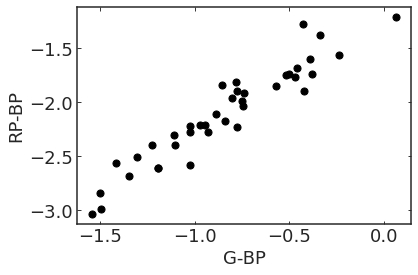

In [15]:
fig, ax=plt.subplots()
ax.scatter(gaia.phot_g_mean_mag-gaia.phot_bp_mean_mag, \
           gaia.phot_rp_mean_mag-gaia.phot_bp_mean_mag, s=50, c='k')
ax.set(xlabel='G-BP', ylabel='RP-BP')

[Text(0.5, 0, 'i-z'), Text(0, 0.5, 'spectral type')]

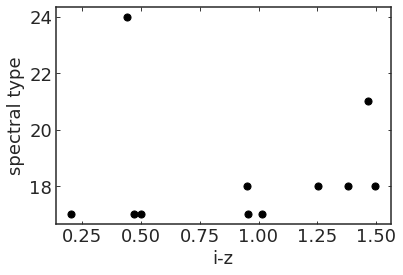

In [16]:
fig, ax=plt.subplots()
ax.scatter(merged_ps1.imag-merged_ps1.zmag, \
          merged_ps1.spt, s=50, c='k')
ax.set(xlabeL='i-z', ylabel='spectral type')

In [17]:
#splat.

In [18]:
#gaia.sort_values('distance')[['grism_id', 'ra', 'dec', 'angDist', 'distance', 'ruwe', 'pmra', 'pmdec']]

In [19]:
#mask=(abs(gaia.gaia_distance_er/gaia.gaia_distance) <0.5).values
mask=np.ones_like(gaia.gaia_distance).astype(bool)

In [20]:
gaia['distance']=[x.value for x in\
                  np.array(gaia.spectra.apply(lambda x: pd.Series(x.distance)).val)]
gaia['distance_er']=np.nanmedian(gaia.spectra.apply(lambda x: pd.Series(x.distance['er'])),axis=1)

In [21]:
#gaia['distance']]

In [22]:
import matplotlib
import numpy as np
from astropy.table import Table
cmap =matplotlib.cm.get_cmap("cividis")
normalize = matplotlib.colors.Normalize(vmin=15, vmax=21)

In [23]:
#normalized spectral types
norm_spts=gaia.spectra.apply(lambda x: x.spectral_type[0])[mask].values

In [24]:
#read missed 
missed=  Table.read('/users/caganze/research/wisps/libraries/candidates_missed.tex').to_pandas()

In [25]:
mask= np.logical_and.reduce([norm_spts>=15, gaia.gaia_distance.values>0.0, \
                     gaia.designation != 'J16252493+5721274', \
                             gaia.designation.isin(missed.designation)])
mask2=np.logical_and.reduce([merged_gaia.spt.values>=17, merged_gaia.spt.values>0.0,\
                            merged_gaia.designation_y != 'J16252493+5721274'])

In [26]:
merged_gaiax=merged_gaia[mask2]

In [27]:
#

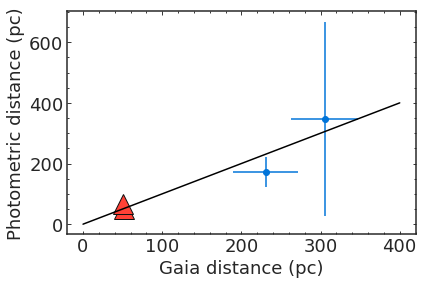

In [28]:
fig, ax=plt.subplots()

ax.errorbar(gaia.gaia_distance[mask], gaia.distance.values[mask],\
            xerr= gaia.gaia_distance_er[mask], \
            yerr=gaia.distance_er[mask], zorder=0., fmt='o', c='#0074D9')
#c=ax.scatter(gaia.gaia_distance[mask], gaia.distance.values[mask],\
#           c=norm_spts[mask], vmin=15, vmax=21, cmap='viridis_r', zorder=100, marker='o')
c=ax.errorbar(merged_gaiax.gaia_distance, merged_gaiax.distance, 
              xerr=merged_gaiax.gaia_distance_er, 
              yerr=np.nanmedian(merged_gaiax.distance_er.values[0]), 
            mec='#111111', mfc='#FF4136', zorder=0., fmt='^', ms=20)
ax.errorbar(50.5, 67,xerr=0.5, yerr=17,  mfc='#FF4136', mec='#111111', zorder=0., fmt='^', ms=20)

#manually add the second source

#add the etra
#add the 
ax.plot((0, 400), (0, 400), c='k')
ax.minorticks_on()
#cbar=plt.colorbar(c)
#cbar.ax.set_yticks([15, 16, 17, 18, 19, 20, 21], major=True)
#cbar.ax.set_yticklabels(['M5', 'M6', 'M7', 'M8', 'M9', 'L0', 'L1'])
ax.set( xlabel='Gaia distance (pc)', \
       ylabel='Photometric distance (pc)')
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/gaia_distance_comparison.pdf')



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


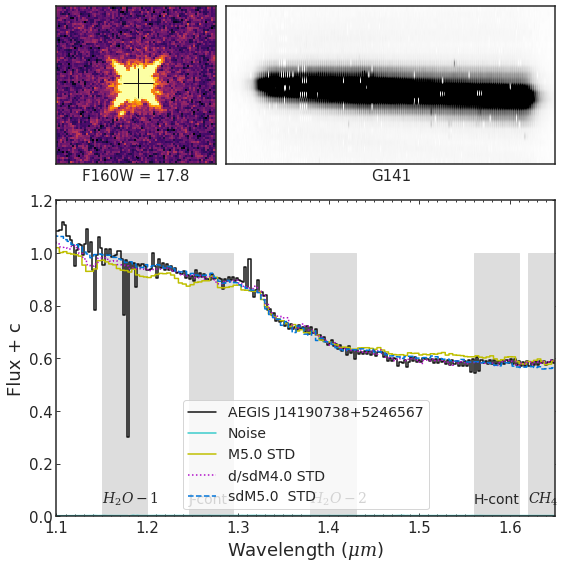

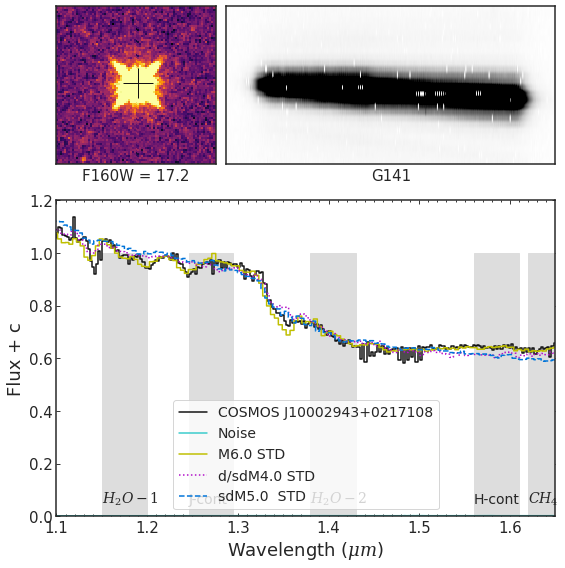

In [29]:
_=gaia[mask].spectra.apply(lambda x: x.plot(compare_to_sds=True, comprange=[[1.2, 1.65]]))

In [36]:
gaia[mask][['designation', 'gaia_distance', 'gaia_distance_er', 'distance', 'distance_er']]

,designation,gaia_distance,gaia_distance_er,distance,distance_er
0,J14190738+5246567,305.280921,42.027866,347.843417,320.367388
2,J10002943+0217108,230.511063,40.747216,172.901973,50.197478
